## Load the datasets

### Subtask:
Load the training and testing data from the specified CSV files into pandas DataFrames.


In [1]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

import pickle
def load_model(path):
    with open(path, 'rb') as f:
        return pickle.load(f)
def dump_model(obj, path):
    with open(path, 'wb') as f:
        pickle.dump(obj, f)


In [2]:
import pandas as pd

train_df = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv")
test_df = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv")

display(train_df.head(n=6))
display(test_df.head())

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,trafficSource.isTrueDirect,purchaseValue,browser,device.screenResolution,trafficSource.adContent,trafficSource.keyword,screenSize,geoCluster,trafficSource.adwordsClickInfo.slot,device.mobileDeviceBranding,...,device.language,deviceType,userChannel,device.browserVersion,totalHits,device.screenColors,sessionStart,geoNetwork.continent,device.isMobile,new_visits
0,NaN,0.0,Edge,not available in demo dataset,NaN,NaN,medium,Region_2,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1500100799,Americas,False,1.0
1,True,0.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Direct,not available in demo dataset,1,not available in demo dataset,1495262065,Americas,False,1.0
2,True,0.0,Chrome,not available in demo dataset,NaN,(not provided),medium,Region_2,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Organic Search,not available in demo dataset,6,not available in demo dataset,1508510328,Europe,False,NaN
3,NaN,0.0,Internet Explorer,not available in demo dataset,NaN,NaN,medium,Region_4,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1483431838,Asia,False,1.0
4,True,88950000.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Direct,not available in demo dataset,66,not available in demo dataset,1475804633,Americas,False,1.0
5,True,28000000.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_4,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Referral,not available in demo dataset,48,not available in demo dataset,1505506252,Americas,False,NaN


,userChannel,date,browser,device.browserSize,device.browserVersion,deviceType,device.flashVersion,device.isMobile,device.language,device.mobileDeviceBranding,...,trafficSource,sessionId,sessionNumber,sessionStart,userId,locationZone,geoCluster,browserMajor,screenSize,gclIdPresent
0,Social,20170508,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,...,groups.google.com,1494262567,2,1494262567,59555,8,Region_2,not available in demo dataset,medium,0
1,Organic Search,20170405,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,...,google,1491433811,1,1491433811,6394,8,Region_1,not available in demo dataset,medium,0
2,Organic Search,20170308,Safari,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,...,google,1489001815,1,1489001815,38969,8,Region_5,not available in demo dataset,medium,0
3,Referral,20171113,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,...,docs.google.com,1510593024,30,1510593024,120027,8,Region_2,not available in demo dataset,medium,0
4,Organic Search,20161212,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,...,(direct),1481559809,1,1481559809,69453,8,Region_3,not available in demo dataset,medium,0


## Perform eda and visualizations

### Subtask:
Conduct exploratory data analysis to understand the data distribution, identify missing values, outliers, and relationships between features and the target variable (`purchaseValue`). Visualize key aspects of the data.


In [3]:
print("Shape of train_df:", train_df.shape)
print("Shape of test_df:", test_df.shape)

print("\nData types of train_df:")
train_df.info()

print("\nData types of test_df:")
test_df.info()

print("\nMissing values in train_df:")
print(train_df.isnull().sum())

print("\nMissing values in test_df:")
print(test_df.isnull().sum())

Shape of train_df: (116023, 52)
Shape of test_df: (29006, 51)

Data types of train_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116023 entries, 0 to 116022
Data columns (total 52 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   trafficSource.isTrueDirect                    42890 non-null   object 
 1   purchaseValue                                 116023 non-null  float64
 2   browser                                       116023 non-null  object 
 3   device.screenResolution                       116023 non-null  object 
 4   trafficSource.adContent                       2963 non-null    object 
 5   trafficSource.keyword                         44162 non-null   object 
 6   screenSize                                    116023 non-null  object 
 7   geoCluster                                    116023 non-null  object 
 8   trafficSource.adwordsClickInfo.slot  


Descriptive statistics for numerical columns in train_df:


,purchaseValue,userId,gclIdPresent,sessionNumber,totals.visits,sessionId,trafficSource.adwordsClickInfo.page,pageViews,locationZone,totals.bounces,date,totalHits,sessionStart,new_visits
count,1.160230e+05,116023.000000,116023.000000,116023.000000,116023.0,1.160230e+05,4281.000000,116015.000000,116023.0,47148.0,1.160230e+05,116023.000000,1.160230e+05,80518.0
mean,2.656393e+07,61094.356231,0.037019,2.691311,1.0,1.493429e+09,1.019622,8.412352,8.0,1.0,2.016860e+07,10.607371,1.493429e+09,1.0
std,2.051825e+08,35240.756859,0.188808,10.451613,0.0,1.528798e+07,0.174517,14.344937,0.0,0.0,6.182322e+03,19.629576,1.528798e+07,0.0
min,0.000000e+00,0.000000,0.000000,1.000000,1.0,1.470035e+09,1.000000,1.000000,8.0,1.0,2.016080e+07,1.000000,1.470035e+09,1.0
25%,0.000000e+00,30603.500000,0.000000,1.000000,1.0,1.480066e+09,1.000000,1.000000,8.0,1.0,2.016112e+07,1.000000,1.480066e+09,1.0
50%,0.000000e+00,61014.000000,0.000000,1.000000,1.0,1.491646e+09,1.000000,2.000000,8.0,1.0,2.017041e+07,2.000000,1.491646e+09,1.0
75%,0.000000e+00,91616.500000,0.000000,2.000000,1.0,1.505079e+09,1.000000,10.000000,8.0,1.0,2.017091e+07,12.000000,1.505079e+09,1.0
max,2.312950e+10,122276.000000,1.000000,447.000000,1.0,1.525157e+09,5.000000,469.000000,8.0,1.0,2.018043e+07,500.000000,1.525157e+09,1.0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


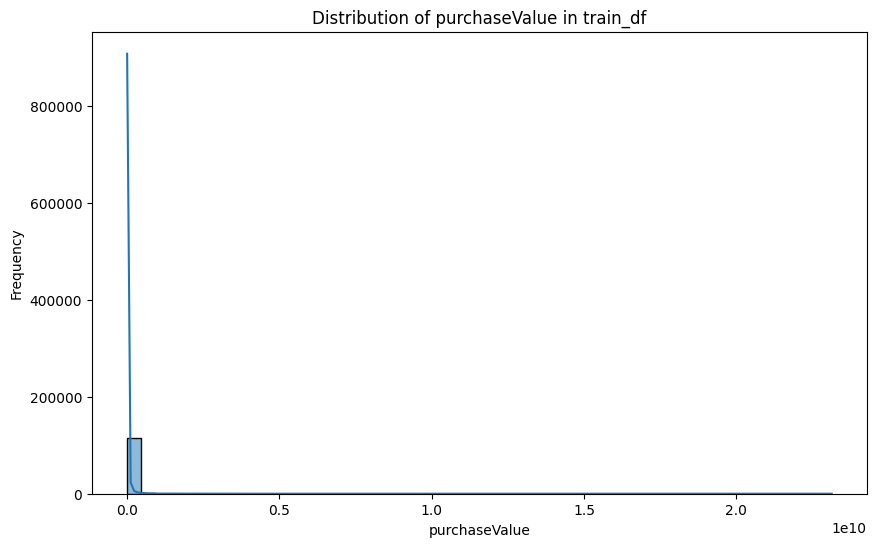

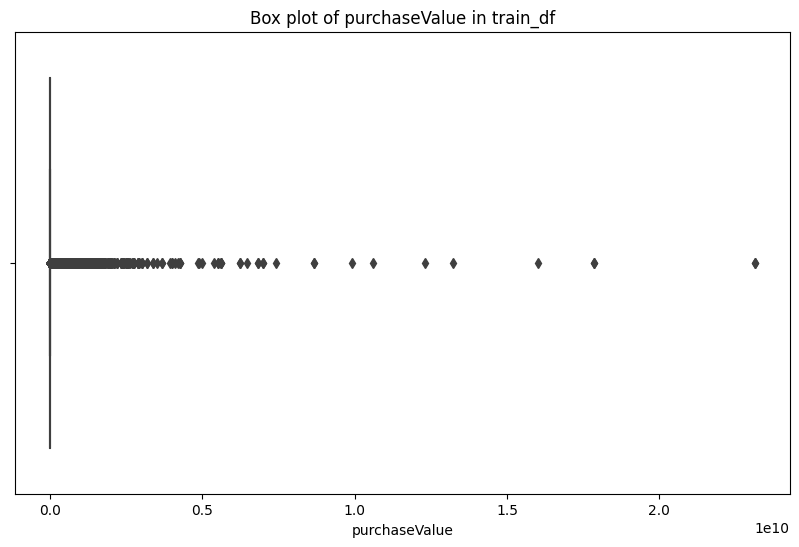

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\nDescriptive statistics for numerical columns in train_df:")
display(train_df.describe())

plt.figure(figsize=(10, 6))
sns.histplot(train_df['purchaseValue'], bins=50, kde=True)
plt.title('Distribution of purchaseValue in train_df')
plt.xlabel('purchaseValue')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['purchaseValue'])
plt.title('Box plot of purchaseValue in train_df')
plt.xlabel('purchaseValue')
plt.show()

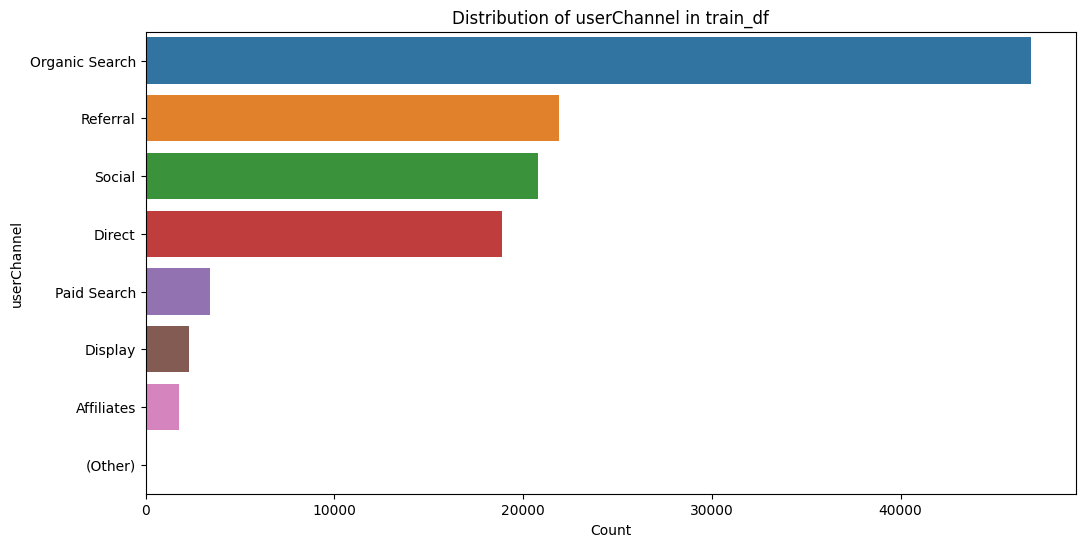

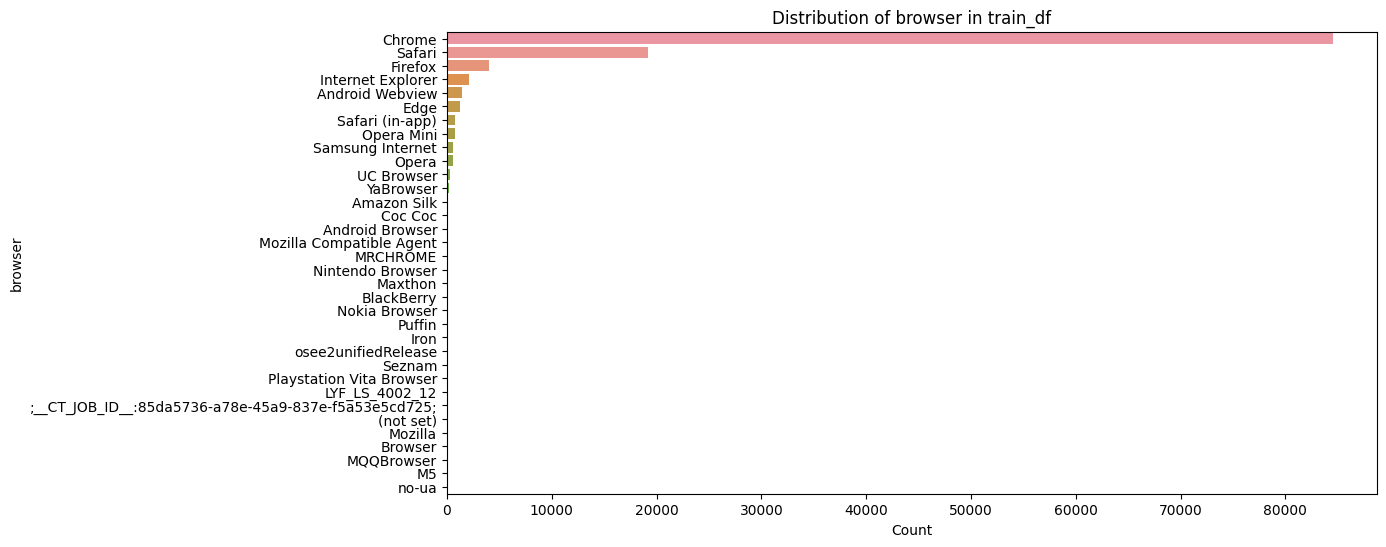

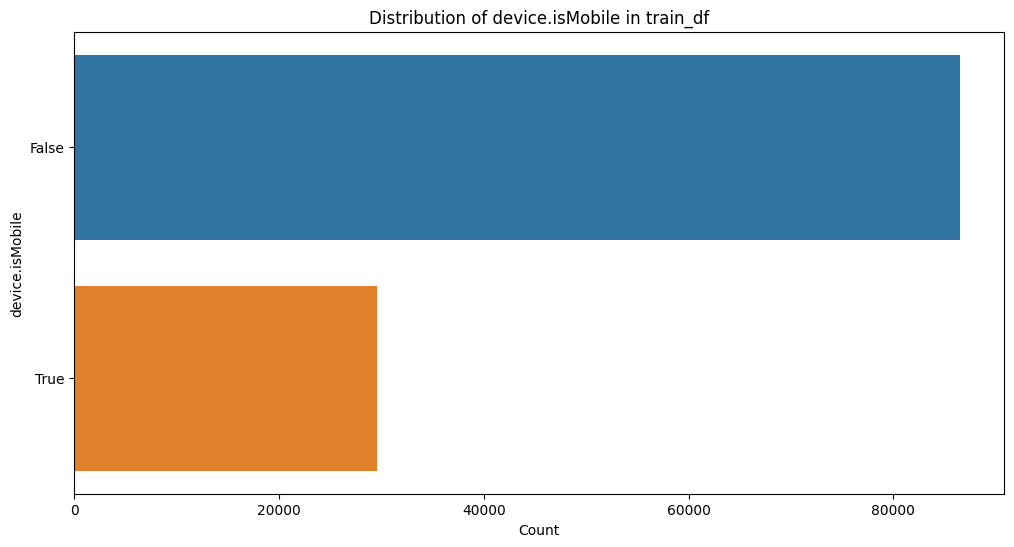

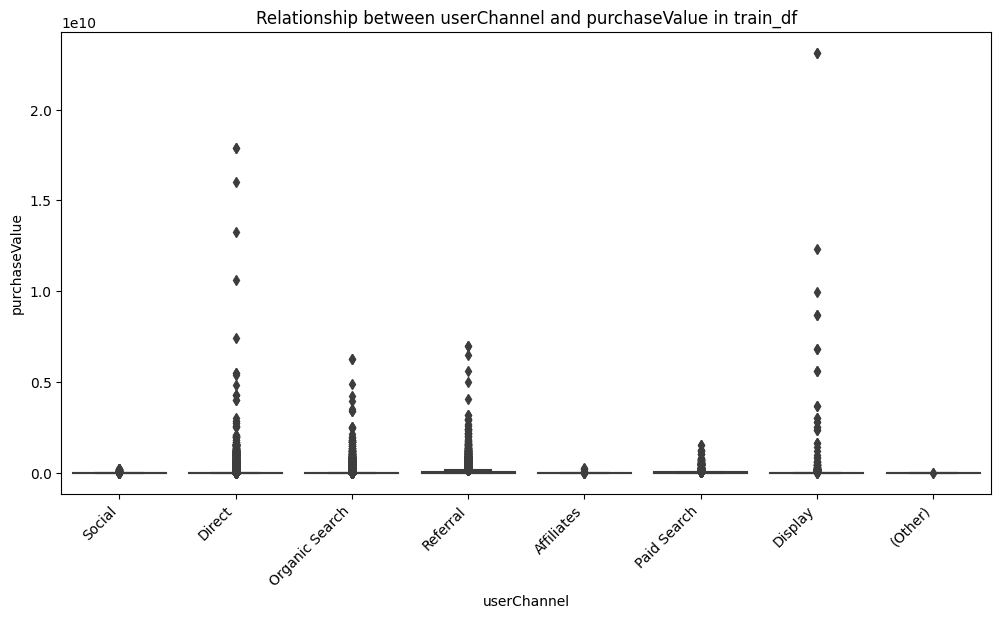

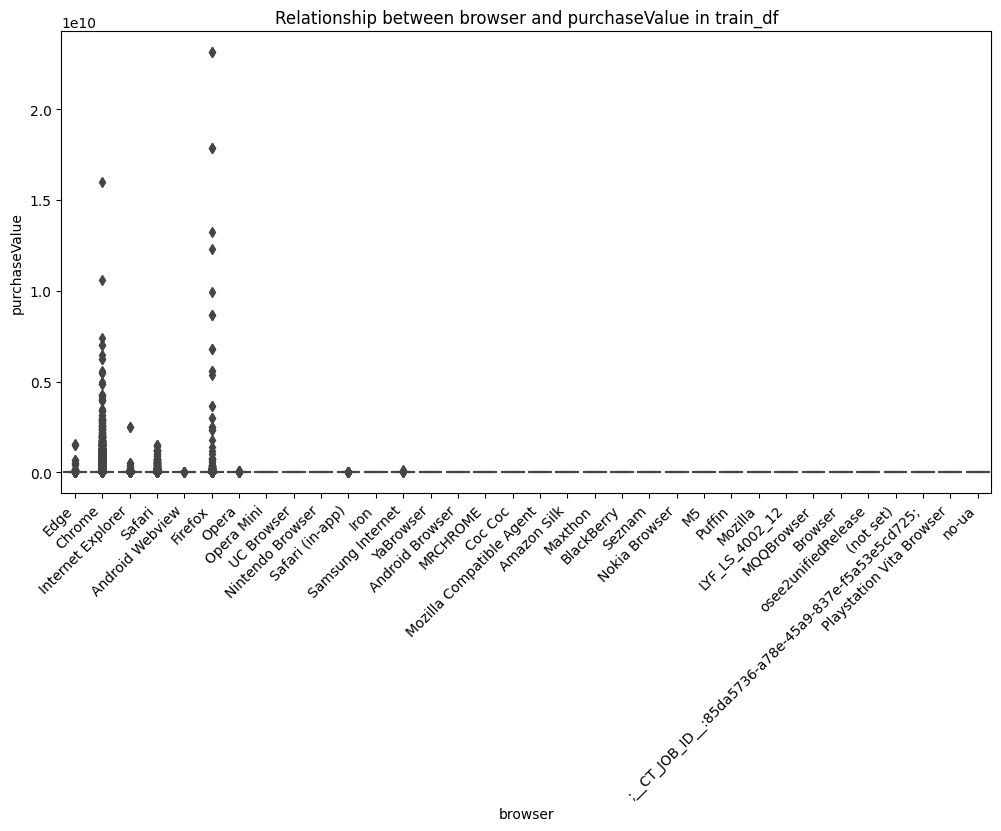

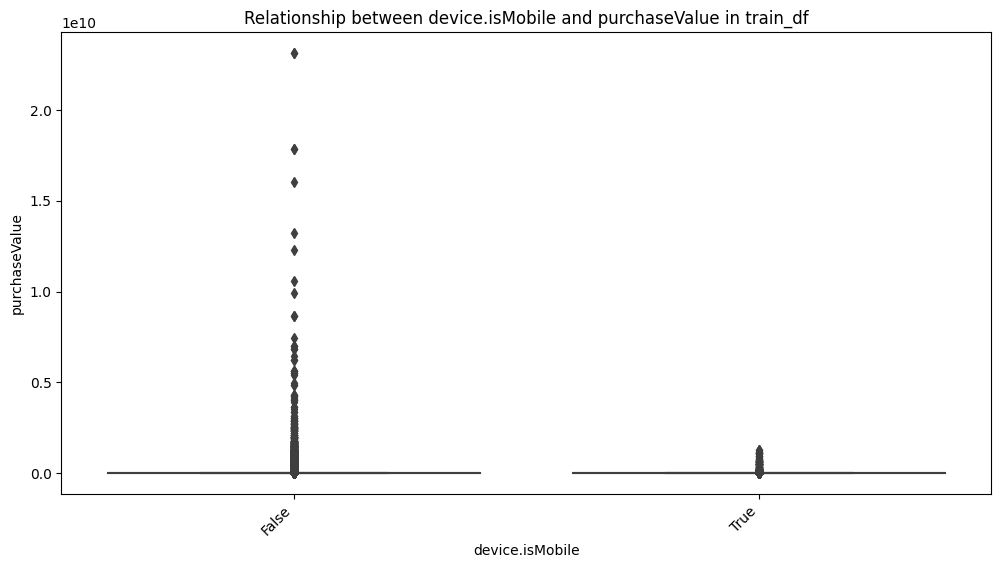

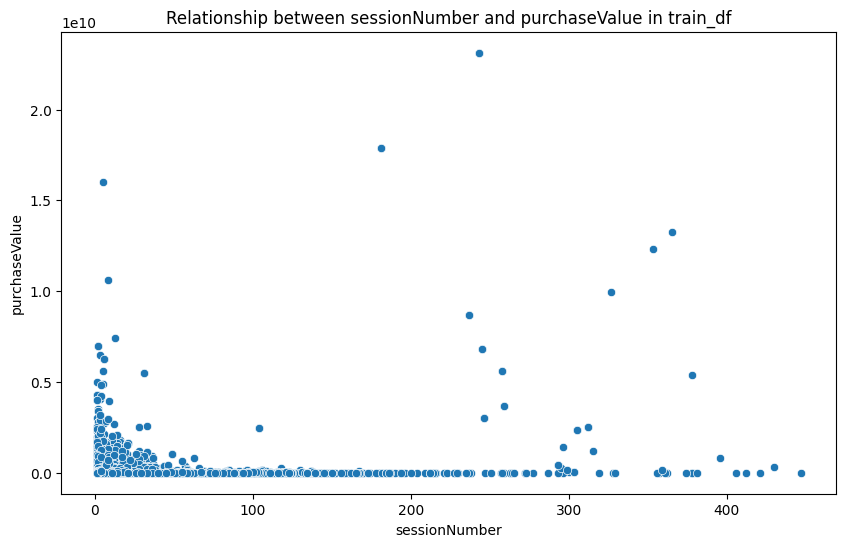

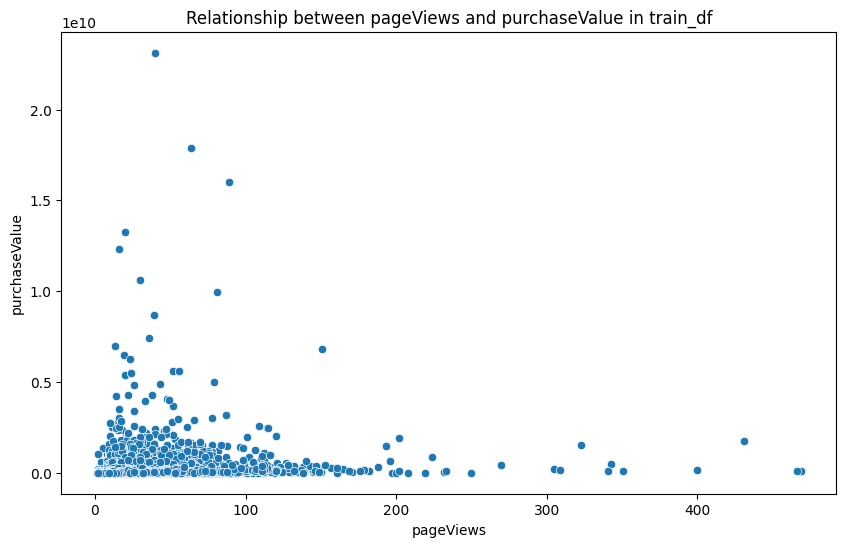

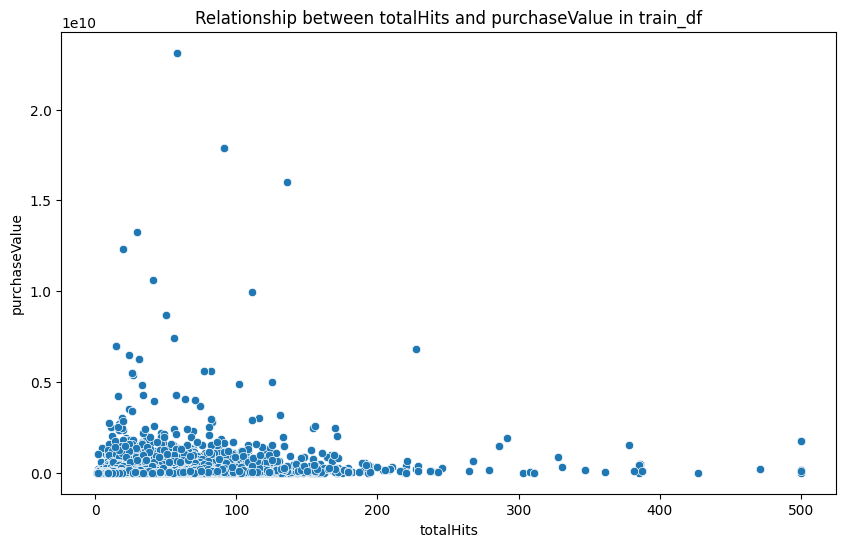

In [5]:
categorical_features = ['userChannel', 'browser', 'device.isMobile']
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(y=train_df[feature], order = train_df[feature].value_counts().index)
    plt.title(f'Distribution of {feature} in train_df')
    plt.xlabel('Count')
    plt.ylabel(feature)
    plt.show()

selected_categorical_features = ['userChannel', 'browser', 'device.isMobile']
for feature in selected_categorical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=feature, y='purchaseValue', data=train_df)
    plt.title(f'Relationship between {feature} and purchaseValue in train_df')
    plt.xlabel(feature)
    plt.ylabel('purchaseValue')
    plt.xticks(rotation=45, ha='right')
    plt.show()

numerical_features = ['sessionNumber', 'pageViews', 'totalHits']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature, y='purchaseValue', data=train_df)
    plt.title(f'Relationship between {feature} and purchaseValue in train_df')
    plt.xlabel(feature)
    plt.ylabel('purchaseValue')
    plt.show()

## Perform statistical analysis

### Subtask:
Conduct statistical tests  to confirm observations from EDA.


In [6]:
display(train_df.describe())
display(test_df.describe())

,purchaseValue,userId,gclIdPresent,sessionNumber,totals.visits,sessionId,trafficSource.adwordsClickInfo.page,pageViews,locationZone,totals.bounces,date,totalHits,sessionStart,new_visits
count,1.160230e+05,116023.000000,116023.000000,116023.000000,116023.0,1.160230e+05,4281.000000,116015.000000,116023.0,47148.0,1.160230e+05,116023.000000,1.160230e+05,80518.0
mean,2.656393e+07,61094.356231,0.037019,2.691311,1.0,1.493429e+09,1.019622,8.412352,8.0,1.0,2.016860e+07,10.607371,1.493429e+09,1.0
std,2.051825e+08,35240.756859,0.188808,10.451613,0.0,1.528798e+07,0.174517,14.344937,0.0,0.0,6.182322e+03,19.629576,1.528798e+07,0.0
min,0.000000e+00,0.000000,0.000000,1.000000,1.0,1.470035e+09,1.000000,1.000000,8.0,1.0,2.016080e+07,1.000000,1.470035e+09,1.0
25%,0.000000e+00,30603.500000,0.000000,1.000000,1.0,1.480066e+09,1.000000,1.000000,8.0,1.0,2.016112e+07,1.000000,1.480066e+09,1.0
50%,0.000000e+00,61014.000000,0.000000,1.000000,1.0,1.491646e+09,1.000000,2.000000,8.0,1.0,2.017041e+07,2.000000,1.491646e+09,1.0
75%,0.000000e+00,91616.500000,0.000000,2.000000,1.0,1.505079e+09,1.000000,10.000000,8.0,1.0,2.017091e+07,12.000000,1.505079e+09,1.0
max,2.312950e+10,122276.000000,1.000000,447.000000,1.0,1.525157e+09,5.000000,469.000000,8.0,1.0,2.018043e+07,500.000000,1.525157e+09,1.0


,date,totals.bounces,totalHits,new_visits,pageViews,totals.visits,trafficSource.adwordsClickInfo.page,sessionId,sessionNumber,sessionStart,userId,locationZone,gclIdPresent
count,2.900600e+04,11732.0,29006.000000,20094.0,29003.000000,29006.0,1107.000000,2.900600e+04,29006.000000,2.900600e+04,29006.000000,29006.0,29006.000000
mean,2.016855e+07,1.0,10.659519,1.0,8.470813,1.0,1.015357,1.493320e+09,2.595980,1.493320e+09,61327.854134,8.0,0.038268
std,6.200443e+03,0.0,19.771218,0.0,14.561705,0.0,0.177227,1.532493e+07,9.333323,1.532493e+07,35253.344987,0.0,0.191846
min,2.016080e+07,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.470035e+09,1.000000,1.470035e+09,8.000000,8.0,0.000000
25%,2.016112e+07,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.479931e+09,1.000000,1.479931e+09,31006.500000,8.0,0.000000
50%,2.017041e+07,1.0,2.000000,1.0,2.000000,1.0,1.000000,1.491492e+09,1.000000,1.491492e+09,61430.500000,8.0,0.000000
75%,2.017091e+07,1.0,12.000000,1.0,10.000000,1.0,1.000000,1.505148e+09,2.000000,1.505148e+09,91866.250000,8.0,0.000000
max,2.018043e+07,1.0,500.000000,1.0,466.000000,1.0,5.000000,1.525152e+09,334.000000,1.525152e+09,122268.000000,8.0,1.000000


## Train-validation split

### Subtask:
Split the training data into training and validation sets.


In [7]:
from sklearn.model_selection import train_test_split

X = train_df.drop('purchaseValue', axis=1)
y = train_df['purchaseValue']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)

Shape of X_train: (92818, 51)
Shape of X_val: (23205, 51)
Shape of y_train: (92818,)
Shape of y_val: (23205,)


## Data cleaning & preprocessing

### Subtask:
Address missing values, handle categorical features (e.g., one-hot encoding), scale numerical features if necessary, and perform any other required preprocessing steps.


In [8]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. Identify columns with a high percentage of missing values
missing_train = X_train.isnull().sum() / len(X_train)
missing_val = X_val.isnull().sum() / len(X_val)
missing_test = test_df.isnull().sum() / len(test_df)

drop_columns_train = missing_train[missing_train > 0.5].index.tolist()
drop_columns_val = missing_val[missing_val > 0.5].index.tolist()
drop_columns_test = missing_test[missing_test > 0.5].index.tolist()

# Combine columns to drop from all datasets
columns_to_drop = list(set(drop_columns_train + drop_columns_val + drop_columns_test))

# Ensure 'purchaseValue' is not in columns_to_drop if it somehow ended up there
if 'purchaseValue' in columns_to_drop:
    columns_to_drop.remove('purchaseValue')

print("Columns to drop due to high missing values:", columns_to_drop)

# 2. Drop the identified columns
X_train_cleaned = X_train.drop(columns=columns_to_drop, errors='ignore')
X_val_cleaned = X_val.drop(columns=columns_to_drop, errors='ignore')
test_df_cleaned = test_df.drop(columns=columns_to_drop, errors='ignore')

# Identify remaining columns with missing values
missing_cols_train = X_train_cleaned.columns[X_train_cleaned.isnull().any()].tolist()
missing_cols_val = X_val_cleaned.columns[X_val_cleaned.isnull().any()].tolist()
missing_cols_test = test_df_cleaned.columns[test_df_cleaned.isnull().any()].tolist()

print("\nRemaining columns with missing values in X_train:", missing_cols_train)
print("Remaining columns with missing values in X_val:", missing_cols_val)
print("Remaining columns with missing values in test_df:", missing_cols_test)

# Identify categorical and numerical columns
categorical_cols = X_train_cleaned.select_dtypes(include='object').columns.tolist()
numerical_cols = X_train_cleaned.select_dtypes(include=np.number).columns.tolist()

print("\nCategorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

# 3. Impute missing values and 5. Apply one-hot encoding
# Use ColumnTransformer to handle different types of features
# Impute numerical columns with median, categorical with most frequent
# One-hot encode categorical columns

# Identify numerical and categorical columns that still have missing values
numerical_cols_with_missing = [col for col in numerical_cols if col in missing_cols_train]
categorical_cols_with_missing = [col for col in categorical_cols if col in missing_cols_train]

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()) # 6. Apply standard scaler
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough' # Keep other columns (if any)
)

# Fit and transform the training data
X_train_processed = preprocessor.fit_transform(X_train_cleaned)

# Transform the validation and test data
X_val_processed = preprocessor.transform(X_val_cleaned)
test_df_processed = preprocessor.transform(test_df_cleaned)

print("\nShape of X_train_processed:", X_train_processed.shape)
print("Shape of X_val_processed:", X_val_processed.shape)
print("Shape of test_df_processed:", test_df_processed.shape)

Columns to drop due to high missing values: ['totals.bounces', 'trafficSource.referralPath', 'trafficSource.adwordsClickInfo.adNetworkType', 'trafficSource.adwordsClickInfo.isVideoAd', 'trafficSource.keyword', 'trafficSource.isTrueDirect', 'trafficSource.adwordsClickInfo.page', 'trafficSource.adContent', 'trafficSource.adwordsClickInfo.slot']

Remaining columns with missing values in X_train: ['pageViews', 'new_visits']
Remaining columns with missing values in X_val: ['pageViews', 'new_visits']
Remaining columns with missing values in test_df: ['new_visits', 'pageViews']

Categorical columns: ['browser', 'device.screenResolution', 'screenSize', 'geoCluster', 'device.mobileDeviceBranding', 'device.mobileInputSelector', 'trafficSource.campaign', 'device.mobileDeviceMarketingName', 'geoNetwork.networkDomain', 'device.operatingSystemVersion', 'device.flashVersion', 'geoNetwork.region', 'trafficSource', 'geoNetwork.networkLocation', 'os', 'geoNetwork.subContinent', 'trafficSource.medium', '

## Build a baseline model

### Subtask:
Train a simple model (e.g., Linear Regression or a simple tree-based model) as a baseline for comparison.


In [9]:
from sklearn.linear_model import LinearRegression

# Instantiate the Linear Regression model
baseline_model = LinearRegression()

# Train the model using the preprocessed training data
baseline_model.fit(X_train_processed, y_train)

print("Baseline model training complete.")

Baseline model training complete.


## Evaluate the baseline model

### Subtask:
Evaluate the baseline model using the R2 score on the validation set.


In [10]:
from sklearn.metrics import r2_score

# Make predictions on the validation set
y_pred_baseline = baseline_model.predict(X_val_processed)

# Calculate the R2 score
r2 = r2_score(y_val, y_pred_baseline)

# Print the R2 score
print(f"R2 score for the baseline model on the validation set: {r2}")

R2 score for the baseline model on the validation set: 0.1332806938993144


## Save the baseline model

### Subtask:
Save the trained baseline model for later use.


In [11]:
import pickle
import os


drive_path = "/kaggle/working/"
model_filename = 'baseline_model.pkl'
model_save_path = os.path.join(drive_path, model_filename)

# Save the trained baseline_model as a .pkl file
dump_model(baseline_model, model_save_path)

print(f"Baseline model saved successfully to {model_save_path}")

Baseline model saved successfully to /kaggle/working/baseline_model.pkl


## Train linear regression and sgd regressor models

### Subtask:
Train both Linear Regression and SGD Regressor models using the preprocessed training data.


In [12]:
from sklearn.linear_model import SGDRegressor

# Instantiate the SGD Regressor model
sgd_model = SGDRegressor(random_state=42)

# Train the model using the preprocessed training data
sgd_model.fit(X_train_processed, y_train)

print("SGD Regressor model training complete.")

SGD Regressor model training complete.


## Tune hyperparameters for sgd regressor

### Subtask:
Tune the hyperparameters of the SGD Regressor model using a suitable method (e.g., GridSearchCV or RandomizedSearchCV) and the specified random state.


In [13]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, loguniform

# Define a hyperparameter distribution for SGDRegressor
param_distributions = {
    'loss': ['squared_error', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': loguniform(1e-4, 1e-1),
    'l1_ratio': uniform(0, 1),
}

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=sgd_model,
    param_distributions=param_distributions,
    n_iter=20,  # Number of parameter settings that are sampled
    cv=5,       # 5-fold cross-validation
    scoring='r2',
    random_state=42,
    n_jobs=-1   # Use all available cores
)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train_processed, y_train)

# Print the best hyperparameters
print("Best hyperparameters found by RandomizedSearchCV:")
print(random_search.best_params_)

# Store the best model
best_sgd_model = random_search.best_estimator_

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stocha

Best hyperparameters found by RandomizedSearchCV:
{'alpha': 0.002386418878005608, 'l1_ratio': 0.33370861113902184, 'loss': 'epsilon_insensitive', 'penalty': 'l1'}


## Evaluate the models

### Subtask:
Evaluate the performance of both the tuned SGD Regressor model and the Linear Regression model (the baseline from Milestone 1) using the R2 score on the validation set.


In [14]:
# Make predictions with the tuned SGD Regressor model
y_pred_sgd = best_sgd_model.predict(X_val_processed)

# Calculate the R2 score for the tuned SGD Regressor
r2_sgd = r2_score(y_val, y_pred_sgd)

# Print the R2 score for the tuned SGD Regressor
print(f"R2 score for the tuned SGD Regressor on the validation set: {r2_sgd}")

# The R2 score for the baseline Linear Regression model has already been calculated
print(f"R2 score for the baseline Linear Regression model on the validation set: {r2}")

R2 score for the tuned SGD Regressor on the validation set: -0.017249502766196745
R2 score for the baseline Linear Regression model on the validation set: 0.1332806938993144


## Save the models

### Subtask:
Save the trained and tuned SGD Regressor model and the Linear Regression model.


In [15]:
# Defining the file paths for saving the models
sgd_model_filename = 'tuned_sgd_regressor_model.pkl'
sgd_model_save_path = os.path.join(drive_path, sgd_model_filename)

linear_model_filename = 'baseline_linear_regression_model.pkl'
linear_model_save_path = os.path.join(drive_path, linear_model_filename)

# Save the tuned SGD Regressor model
dump_model(best_sgd_model, sgd_model_save_path)

# Save the baseline Linear Regression model (already done in Milestone 1, but re-saving to be explicit for this subtask)
dump_model(baseline_model, linear_model_save_path)

print(f"Tuned SGD Regressor model saved successfully to {sgd_model_save_path}")
print(f"Baseline Linear Regression model saved successfully to {linear_model_save_path}")

Tuned SGD Regressor model saved successfully to /kaggle/working/tuned_sgd_regressor_model.pkl
Baseline Linear Regression model saved successfully to /kaggle/working/baseline_linear_regression_model.pkl


## Apply dimensionality reduction & feature selection

### Subtask:
Apply dimensionality reduction and/or feature selection techniques to the preprocessed data.


In [16]:
from sklearn.feature_selection import SelectKBest, f_regression

# Create a SelectKBest object
k_features = 50
selector = SelectKBest(score_func=f_regression, k=k_features)

# Fit SelectKBest to the processed training data
selector.fit(X_train_processed, y_train)

# Transform the processed training, validation, and test data
X_train_reduced = selector.transform(X_train_processed)
X_val_reduced = selector.transform(X_val_processed)
test_df_reduced = selector.transform(test_df_processed)

print(f"Original number of features: {X_train_processed.shape[1]}")
print(f"Reduced number of features: {X_train_reduced.shape[1]}")
print("Feature selection applied successfully.")

Original number of features: 1630
Reduced number of features: 50
Feature selection applied successfully.


## Retrain naive bayes model

### Subtask:
Train a Naive Bayes model using the processed data.


In [17]:
from sklearn.naive_bayes import GaussianNB

# Instantiate a Gaussian Naive Bayes model
nb_model = GaussianNB()

# Train the Naive Bayes model using the reduced training data (converted to dense)
nb_model.fit(X_train_reduced.toarray(), y_train)

print("Gaussian Naive Bayes model training complete.")

Gaussian Naive Bayes model training complete.


## Retrain knn model

### Subtask:
Retrain knn model


In [18]:
from sklearn.neighbors import KNeighborsRegressor

# Instantiate a KNeighborsRegressor object
knn_model = KNeighborsRegressor()

# Train the KNN model using the reduced training data (converted to dense) and the training target variable
knn_model.fit(X_train_reduced.toarray(), y_train)

print("KNN model training complete.")

KNN model training complete.


## Retrain svm model

### Subtask:
Retrain svm model


In [19]:
from sklearn.svm import SVR

# Instantiate an SVR object
svm_model = SVR()

# Train the SVR model using the reduced training data (converted to dense) and the training target variable
svm_model.fit(X_train_reduced.toarray(), y_train)

print("SVM model training complete.")

SVM model training complete.


## Evaluate the models

### Subtask:
Evaluate the performance of the Naive Bayes, KNN, and SVM models using the R2 score on the validation set.


In [20]:
from sklearn.metrics import r2_score

# Make predictions on the reduced validation set (converted to dense)
y_pred_nb = nb_model.predict(X_val_reduced.toarray())
y_pred_knn = knn_model.predict(X_val_reduced.toarray())
y_pred_svm = svm_model.predict(X_val_reduced.toarray())

# Calculate the R2 score for each model
r2_nb = r2_score(y_val, y_pred_nb)
r2_knn = r2_score(y_val, y_pred_knn)
r2_svm = r2_score(y_val, y_pred_svm)

# Print the R2 scores
print(f"R2 score for Naive Bayes model on the validation set: {r2_nb}")
print(f"R2 score for KNN model on the validation set: {r2_knn}")
print(f"R2 score for SVM model on the validation set: {r2_svm}")

R2 score for Naive Bayes model on the validation set: -0.11446335241945049
R2 score for KNN model on the validation set: -0.031763013939853924
R2 score for SVM model on the validation set: -0.017264194680948197


## Save each model

### Subtask:
Save the trained Naive Bayes, KNN, and SVM models.


In [21]:
# Define the file paths for saving the models
nb_model_filename = 'naive_bayes_model.pkl'
nb_model_save_path = os.path.join(drive_path, nb_model_filename)

knn_model_filename = 'knn_model.pkl'
knn_model_save_path = os.path.join(drive_path, knn_model_filename)

svm_model_filename = 'svm_model.pkl'
svm_model_save_path = os.path.join(drive_path, svm_model_filename)

# Save the trained models
dump_model(nb_model, nb_model_save_path)
dump_model(knn_model, knn_model_save_path)
dump_model(svm_model, svm_model_save_path)

print(f"Naive Bayes model saved successfully to {nb_model_save_path}")
print(f"KNN model saved successfully to {knn_model_save_path}")
print(f"SVM model saved successfully to {svm_model_save_path}")

Naive Bayes model saved successfully to /kaggle/working/naive_bayes_model.pkl
KNN model saved successfully to /kaggle/working/knn_model.pkl
SVM model saved successfully to /kaggle/working/svm_model.pkl


## Implement ensemble methods

### Subtask:
Implement Bagging, Boosting, and Stacking ensemble methods.


In [22]:
from sklearn.ensemble import BaggingRegressor

# Instantiate a Bagging Regressor model
bagging_model = BaggingRegressor(random_state=42)

# Train the Bagging Regressor model using the reduced training data (converted to dense)
bagging_model.fit(X_train_reduced.toarray(), y_train)

print("Bagging Regressor model training complete.")

Bagging Regressor model training complete.


In [23]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Instantiate an XGBoost Regressor model (as one type of boosting)
# Using random_state=39 as specified for boosting models
xgboost_model = XGBRegressor(random_state=39)

# Train the XGBoost Regressor model using the reduced training data
xgboost_model.fit(X_train_reduced, y_train)

print("XGBoost Regressor model training complete.")

# Instantiate a LightGBM Regressor model (as another type of boosting)
# Using random_state=39
lightgbm_model = LGBMRegressor(random_state=39)

# Train the LightGBM Regressor model using the reduced training data
lightgbm_model.fit(X_train_reduced, y_train)

print("LightGBM Regressor model training complete.")

XGBoost Regressor model training complete.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013423 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 562
[LightGBM] [Info] Number of data points in the train set: 92818, number of used features: 50
[LightGBM] [Info] Start training from score 26062476.150057
LightGBM Regressor model training complete.


In [24]:
from sklearn.ensemble import VotingRegressor



estimators = [
    ('linear', baseline_model),
    ('sgd', best_sgd_model),
    ('naive_bayes', nb_model),
    ('knn', knn_model),
    ('svm', svm_model),
    ('bagging', bagging_model),
    ('xgboost', xgboost_model),
    ('lightgbm', lightgbm_model)
]

# Instantiate a VotingRegressor
voting_model = VotingRegressor(estimators=estimators, n_jobs=-1)



# Identify which estimators need dense input
dense_estimators = ['naive_bayes', 'knn', 'svm', 'bagging']



In [25]:
# Create a list of estimators for the Voting Regressor, excluding GaussianNB
estimators_reduced_data = [
    ('knn', knn_model),
    ('svm', svm_model),
    ('bagging', bagging_model),
    ('xgboost', xgboost_model),
    ('lightgbm', lightgbm_model)
]

# Instantiate a VotingRegressor
voting_model_reduced = VotingRegressor(estimators=estimators_reduced_data, n_jobs=-1)


try:
    voting_model_reduced.fit(X_train_reduced, y_train)
    print("Voting Regressor model training complete on reduced data (sparse input).")
except TypeError:
    print("Sparse input not supported by all estimators in VotingRegressor. Converting to dense.")
    voting_model_reduced.fit(X_train_reduced.toarray(), y_train)
    print("Voting Regressor model training complete on reduced data (dense input).")

print("Stacking Ensemble (Voting Regressor) model training complete.")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 562
[LightGBM] [Info] Number of data points in the train set: 92818, number of used features: 50
[LightGBM] [Info] Start training from score 26062476.150057
Voting Regressor model training complete on reduced data (sparse input).
Stacking Ensemble (Voting Regressor) model training complete.


In [26]:
# Make predictions on the reduced validation set
y_pred_bagging = bagging_model.predict(X_val_reduced.toarray()) # Bagging was trained on dense
y_pred_xgboost = xgboost_model.predict(X_val_reduced)
y_pred_lightgbm = lightgbm_model.predict(X_val_reduced)
y_pred_voting = voting_model_reduced.predict(X_val_reduced) # VotingRegressor was trained on sparse

# Calculate the R2 score for each model
r2_bagging = r2_score(y_val, y_pred_bagging)
r2_xgboost = r2_score(y_val, y_pred_xgboost)
r2_lightgbm = r2_score(y_val, y_pred_lightgbm)
r2_voting = r2_score(y_val, y_pred_voting)

# Print the R2 scores
print(f"R2 score for Bagging Regressor model on the validation set: {r2_bagging}")
print(f"R2 score for XGBoost Regressor model on the validation set: {r2_xgboost}")
print(f"R2 score for LightGBM Regressor model on the validation set: {r2_lightgbm}")
print(f"R2 score for Stacking (Voting Regressor) model on the validation set: {r2_voting}")

R2 score for Bagging Regressor model on the validation set: 0.2221210981068107
R2 score for XGBoost Regressor model on the validation set: 0.22381053106649162
R2 score for LightGBM Regressor model on the validation set: 0.16589644329295683
R2 score for Stacking (Voting Regressor) model on the validation set: 0.2194857780983368


In [27]:
# Define the file paths for saving the models
bagging_model_filename = 'bagging_regressor_model.pkl'
bagging_model_save_path = os.path.join(drive_path, bagging_model_filename)

xgboost_model_filename = 'xgboost_regressor_model.pkl'
xgboost_model_save_path = os.path.join(drive_path, xgboost_model_filename)

lightgbm_model_filename = 'lightgbm_regressor_model.pkl'
lightgbm_model_save_path = os.path.join(drive_path, lightgbm_model_filename)

voting_model_filename = 'voting_regressor_model.pkl'
voting_model_save_path = os.path.join(drive_path, voting_model_filename)


dump_model(bagging_model, bagging_model_save_path)
dump_model(xgboost_model, xgboost_model_save_path)
dump_model(lightgbm_model, lightgbm_model_save_path)
dump_model(voting_model_reduced, voting_model_save_path) # Save the voting model trained on reduced data

print(f"Bagging Regressor model saved successfully to {bagging_model_save_path}")
print(f"XGBoost Regressor model saved successfully to {xgboost_model_save_path}")
print(f"LightGBM Regressor model saved successfully to {lightgbm_model_save_path}")
print(f"Voting Regressor model saved successfully to {voting_model_save_path}")

Bagging Regressor model saved successfully to /kaggle/working/bagging_regressor_model.pkl
XGBoost Regressor model saved successfully to /kaggle/working/xgboost_regressor_model.pkl
LightGBM Regressor model saved successfully to /kaggle/working/lightgbm_regressor_model.pkl
Voting Regressor model saved successfully to /kaggle/working/voting_regressor_model.pkl


## Train multi-layer perceptron (mlp)

### Subtask:
Train a Multi-layer Perceptron (MLP) model using allowed libraries.


In [28]:
from sklearn.neural_network import MLPRegressor

# Instantiate an MLPRegressor object
mlp_model = MLPRegressor(random_state=42)


mlp_model.fit(X_train_reduced.toarray(), y_train)

print("MLP Regressor model training complete.")

MLP Regressor model training complete.


In [29]:
from sklearn.metrics import r2_score

# Make predictions on the reduced validation set (converted to dense)
y_pred_mlp = mlp_model.predict(X_val_reduced.toarray())

# Calculate the R2 score
r2_mlp = r2_score(y_val, y_pred_mlp)

# Print the R2 score
print(f"R2 score for MLP Regressor model on the validation set: {r2_mlp}")

R2 score for MLP Regressor model on the validation set: -0.009574804615517074


In [30]:
import pickle
import os

# Define the file path for saving the model
drive_path = "/kaggle/working/"
mlp_model_filename = 'mlp_regressor_model.pkl'
mlp_model_save_path = os.path.join(drive_path, mlp_model_filename)

# Save the trained MLP Regressor model
dump_model(mlp_model, mlp_model_save_path)

print(f"MLP Regressor model saved successfully to {mlp_model_save_path}")

MLP Regressor model saved successfully to /kaggle/working/mlp_regressor_model.pkl


## Evaluate the models

### Subtask:
Evaluate the performance of the ensemble models and the MLP model using the R2 score on the validation set.


In [31]:
# Make predictions on the reduced validation set (converted to dense if necessary)
y_pred_bagging = bagging_model.predict(X_val_reduced.toarray())
y_pred_xgboost = xgboost_model.predict(X_val_reduced)
y_pred_lightgbm = lightgbm_model.predict(X_val_reduced)
y_pred_voting = voting_model_reduced.predict(X_val_reduced.toarray()) # Voting Regressor was trained on dense
y_pred_mlp = mlp_model.predict(X_val_reduced.toarray()) # MLP was trained on dense

# Calculate the R2 score for each model
r2_bagging = r2_score(y_val, y_pred_bagging)
r2_xgboost = r2_score(y_val, y_pred_xgboost)
r2_lightgbm = r2_score(y_val, y_pred_lightgbm)
r2_voting = r2_score(y_val, y_pred_voting)
r2_mlp = r2_score(y_val, y_pred_mlp)

# Print the R2 scores
print(f"R2 score for Bagging Regressor model on the validation set: {r2_bagging}")
print(f"R2 score for XGBoost Regressor model on the validation set: {r2_xgboost}")
print(f"R2 score for LightGBM Regressor model on the validation set: {r2_lightgbm}")
print(f"R2 score for Stacking (Voting Regressor) model on the validation set: {r2_voting}")
print(f"R2 score for MLP Regressor model on the validation set: {r2_mlp}")

R2 score for Bagging Regressor model on the validation set: 0.2221210981068107
R2 score for XGBoost Regressor model on the validation set: 0.22381053106649162
R2 score for LightGBM Regressor model on the validation set: 0.16589644329295683
R2 score for Stacking (Voting Regressor) model on the validation set: 0.12451825308290587
R2 score for MLP Regressor model on the validation set: -0.009574804615517074


## Save all ensemble and mlp models

### Subtask:
Save all the trained ensemble models and the MLP model.


In [32]:
# Define the file paths for saving the models
drive_path = "/kaggle/working/"

bagging_model_filename = 'bagging_regressor_model.pkl'
bagging_model_save_path = os.path.join(drive_path, bagging_model_filename)

xgboost_model_filename = 'xgboost_regressor_model.pkl'
xgboost_model_save_path = os.path.join(drive_path, xgboost_model_filename)

lightgbm_model_filename = 'lightgbm_regressor_model.pkl'
lightgbm_model_save_path = os.path.join(drive_path, lightgbm_model_filename)

voting_model_filename = 'voting_regressor_model.pkl'
voting_model_save_path = os.path.join(drive_path, voting_model_filename)

mlp_model_filename = 'mlp_regressor_model.pkl'
mlp_model_save_path = os.path.join(drive_path, mlp_model_filename)

# Save the trained models
dump_model(bagging_model, bagging_model_save_path)
dump_model(xgboost_model, xgboost_model_save_path)
dump_model(lightgbm_model, lightgbm_model_save_path)
dump_model(voting_model_reduced, voting_model_save_path) # Save the voting model trained on reduced data
dump_model(mlp_model, mlp_model_save_path)

print(f"Bagging Regressor model saved successfully to {bagging_model_save_path}")
print(f"XGBoost Regressor model saved successfully to {xgboost_model_save_path}")
print(f"LightGBM Regressor model saved successfully to {lightgbm_model_save_path}")
print(f"Voting Regressor model saved successfully to {voting_model_save_path}")
print(f"MLP Regressor model saved successfully to {mlp_model_save_path}")

Bagging Regressor model saved successfully to /kaggle/working/bagging_regressor_model.pkl
XGBoost Regressor model saved successfully to /kaggle/working/xgboost_regressor_model.pkl
LightGBM Regressor model saved successfully to /kaggle/working/lightgbm_regressor_model.pkl
Voting Regressor model saved successfully to /kaggle/working/voting_regressor_model.pkl
MLP Regressor model saved successfully to /kaggle/working/mlp_regressor_model.pkl


## Rerun the full ml pipeline with improved insights

### Subtask:
Rerun the full ml pipeline with improved insights


In [33]:
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor

# Instantiate XGBoost Regressor model
# Using random_state=39 as specified for boosting models
xgboost_full_data_model = XGBRegressor(random_state=39)

# Train the XGBoost Regressor model using the full preprocessed training data
xgboost_full_data_model.fit(X_train_processed, y_train)

print("XGBoost Regressor model training complete on full preprocessed data.")

# Instantiate a Bagging Regressor model
bagging_full_data_model = BaggingRegressor(random_state=42)

# Train the Bagging Regressor model using the full preprocessed training data
# X_train_processed is a sparse matrix, BaggingRegressor can handle it.
bagging_full_data_model.fit(X_train_processed, y_train)

print("Bagging Regressor model training complete on full preprocessed data.")

XGBoost Regressor model training complete on full preprocessed data.
Bagging Regressor model training complete on full preprocessed data.


In [34]:
from sklearn.metrics import r2_score

# Make predictions on the full preprocessed validation set
y_pred_xgboost_full = xgboost_full_data_model.predict(X_val_processed)
y_pred_bagging_full = bagging_full_data_model.predict(X_val_processed)

# Calculate the R2 score for each model
r2_xgboost_full = r2_score(y_val, y_pred_xgboost_full)
r2_bagging_full = r2_score(y_val, y_pred_bagging_full)

# Print the R2 scores
print(f"R2 score for XGBoost Regressor model on full preprocessed validation set: {r2_xgboost_full}")
print(f"R2 score for Bagging Regressor model on full preprocessed validation set: {r2_bagging_full}")

R2 score for XGBoost Regressor model on full preprocessed validation set: 0.32664529407942666
R2 score for Bagging Regressor model on full preprocessed validation set: 0.20534600966528382


In [35]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define a hyperparameter distribution for XGBoost Regressor
param_distributions_xgb = {
    'n_estimators': randint(100, 1000),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.5),
}

# Instantiate RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=xgboost_full_data_model,
    param_distributions=param_distributions_xgb,
    n_iter=20,  # Number of parameter settings that are sampled
    cv=5,       # 5-fold cross-validation
    scoring='r2',
    random_state=42,
    n_jobs=-1   # Use all available cores
)

# Fit RandomizedSearchCV to the full preprocessed training data
random_search_xgb.fit(X_train_processed, y_train)

# Print the best hyperparameters
print("Best hyperparameters found by RandomizedSearchCV for XGBoost:")
print(random_search_xgb.best_params_)

# Store the best model
best_xgboost_model = random_search_xgb.best_estimator_

Best hyperparameters found by RandomizedSearchCV for XGBoost:
{'colsample_bytree': 0.6443563283247326, 'gamma': 0.21966825093288506, 'learning_rate': 0.050343840467079244, 'max_depth': 9, 'n_estimators': 340, 'subsample': 0.7257423924305306}


In [36]:
# Make predictions with the tuned XGBoost model
y_pred_best_xgboost = best_xgboost_model.predict(X_val_processed)

# Calculate the R2 score for the tuned XGBoost model
r2_best_xgboost = r2_score(y_val, y_pred_best_xgboost)

# Print the R2 score for the tuned XGBoost model
print(f"R2 score for the tuned XGBoost Regressor on the validation set: {r2_best_xgboost}")

R2 score for the tuned XGBoost Regressor on the validation set: 0.3538046327253923


In [37]:
# Combine training and validation data for final model training
X_train_val_processed = preprocessor.transform(pd.concat([X_train_cleaned, X_val_cleaned], ignore_index=True))
y_train_val = pd.concat([y_train, y_val], ignore_index=True)

# Train the best XGBoost model on the combined data
best_xgboost_model.fit(X_train_val_processed, y_train_val)

print("Best XGBoost model training complete on combined data.")

# Make predictions on the test data
test_predictions = best_xgboost_model.predict(test_df_processed)

# Ensure predictions are non-negative
test_predictions[test_predictions < 0] = 0

# Create a submission DataFrame (assuming test_df has a 'sessionId' or similar identifier)
# Based on the head of test_df, 'sessionId' seems like a suitable identifier.
submission_df = pd.DataFrame({'sessionId': test_df['sessionId'], 'PredictedPurchaseValue': test_predictions})

# Save the final best model
final_model_filename = 'final_best_xgboost_model.pkl'
final_model_save_path = os.path.join(drive_path, final_model_filename)
dump_model(best_xgboost_model, final_model_save_path)

print(f"Final best XGBoost model saved successfully to {final_model_save_path}")

# Display the first few rows of the submission DataFrame
print("\nSample Submission DataFrame:")
display(submission_df.head())

Best XGBoost model training complete on combined data.
Final best XGBoost model saved successfully to /kaggle/working/final_best_xgboost_model.pkl

Sample Submission DataFrame:


,sessionId,PredictedPurchaseValue
0,1494262567,2.630001e+07
1,1491433811,2.826642e+06
2,1489001815,0.000000e+00
3,1510593024,2.844138e+05
4,1481559809,7.261098e+04


## Refine feature engineering

### Subtask:
Explore more advanced feature engineering techniques based on the insights gained from EDA and model performance.


In [38]:
# Convert 'date' to datetime objects for feature extraction
X_train_cleaned['date'] = pd.to_datetime(X_train_cleaned['date'], format='%Y%m%d')
X_val_cleaned['date'] = pd.to_datetime(X_val_cleaned['date'], format='%Y%m%d')
test_df_cleaned['date'] = pd.to_datetime(test_df_cleaned['date'], format='%Y%m%d')

# Extract time-based features from 'date'
X_train_cleaned['date_year'] = X_train_cleaned['date'].dt.year
X_train_cleaned['date_month'] = X_train_cleaned['date'].dt.month
X_train_cleaned['date_day'] = X_train_cleaned['date'].dt.day
X_train_cleaned['date_dayofweek'] = X_train_cleaned['date'].dt.dayofweek

X_val_cleaned['date_year'] = X_val_cleaned['date'].dt.year
X_val_cleaned['date_month'] = X_val_cleaned['date'].dt.month
X_val_cleaned['date_day'] = X_val_cleaned['date'].dt.day
X_val_cleaned['date_dayofweek'] = X_val_cleaned['date'].dt.dayofweek

test_df_cleaned['date_year'] = test_df_cleaned['date'].dt.year
test_df_cleaned['date_month'] = test_df_cleaned['date'].dt.month
test_df_cleaned['date_day'] = test_df_cleaned['date'].dt.day
test_df_cleaned['date_dayofweek'] = test_df_cleaned['date'].dt.dayofweek

# Convert 'sessionStart' to datetime objects for feature extraction
X_train_cleaned['sessionStart'] = pd.to_datetime(X_train_cleaned['sessionStart'], unit='s')
X_val_cleaned['sessionStart'] = pd.to_datetime(X_val_cleaned['sessionStart'], unit='s')
test_df_cleaned['sessionStart'] = pd.to_datetime(test_df_cleaned['sessionStart'], unit='s')


# Extract time-based features from 'sessionStart'
X_train_cleaned['session_hour'] = X_train_cleaned['sessionStart'].dt.hour
X_train_cleaned['session_minute'] = X_train_cleaned['sessionStart'].dt.minute

X_val_cleaned['session_hour'] = X_val_cleaned['sessionStart'].dt.hour
X_val_cleaned['session_minute'] = X_val_cleaned['sessionStart'].dt.minute

test_df_cleaned['session_hour'] = test_df_cleaned['sessionStart'].dt.hour
test_df_cleaned['session_minute'] = test_df_cleaned['sessionStart'].dt.minute

# Drop the original 'date' and 'sessionStart' columns as they are no longer needed
X_train_cleaned = X_train_cleaned.drop(columns=['date', 'sessionStart'])
X_val_cleaned = X_val_cleaned.drop(columns=['date', 'sessionStart'])
test_df_cleaned = test_df_cleaned.drop(columns=['date', 'sessionStart'])

print("Time-based features extracted successfully.")

Time-based features extracted successfully.


In [39]:
# Identify categorical and numerical columns again after adding time features
categorical_cols = X_train_cleaned.select_dtypes(include='object').columns.tolist()
numerical_cols = X_train_cleaned.select_dtypes(include=np.number).columns.tolist()

print("\nUpdated Categorical columns:", categorical_cols)
print("Updated Numerical columns:", numerical_cols)

# Re-create the column transformer with the updated column lists
# Use the same imputation strategies and scaling/one-hot encoding as before
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'
)

# Fit and transform the training data with the updated preprocessor
X_train_processed_fe = preprocessor.fit_transform(X_train_cleaned)

# Transform the validation and test data
X_val_processed_fe = preprocessor.transform(X_val_cleaned)
test_df_processed_fe = preprocessor.transform(test_df_cleaned)

print("\nShape of X_train_processed_fe:", X_train_processed_fe.shape)
print("Shape of X_val_processed_fe:", X_val_processed_fe.shape)
print("Shape of test_df_processed_fe:", test_df_processed_fe.shape)


Updated Categorical columns: ['browser', 'device.screenResolution', 'screenSize', 'geoCluster', 'device.mobileDeviceBranding', 'device.mobileInputSelector', 'trafficSource.campaign', 'device.mobileDeviceMarketingName', 'geoNetwork.networkDomain', 'device.operatingSystemVersion', 'device.flashVersion', 'geoNetwork.region', 'trafficSource', 'geoNetwork.networkLocation', 'os', 'geoNetwork.subContinent', 'trafficSource.medium', 'browserMajor', 'locationCountry', 'device.browserSize', 'socialEngagementType', 'geoNetwork.city', 'geoNetwork.metro', 'device.mobileDeviceModel', 'device.language', 'deviceType', 'userChannel', 'device.browserVersion', 'device.screenColors', 'geoNetwork.continent']
Updated Numerical columns: ['userId', 'gclIdPresent', 'sessionNumber', 'totals.visits', 'sessionId', 'pageViews', 'locationZone', 'totalHits', 'new_visits', 'date_year', 'date_month', 'date_day', 'date_dayofweek', 'session_hour', 'session_minute']

Shape of X_train_processed_fe: (92818, 1634)
Shape of 

In [40]:
from xgboost import XGBRegressor

# Instantiate an XGBoost Regressor model with the previously found best hyperparameters
# Using random_state=39 as specified for boosting models
tuned_xgboost_fe_model = XGBRegressor(random_state=39, **random_search_xgb.best_params_)

# Train the model using the preprocessed training data with engineered features
tuned_xgboost_fe_model.fit(X_train_processed_fe, y_train)

print("Tuned XGBoost Regressor model training complete with engineered features.")

Tuned XGBoost Regressor model training complete with engineered features.


In [41]:
from sklearn.metrics import r2_score

# Make predictions on the preprocessed validation set with engineered features
y_pred_tuned_xgboost_fe = tuned_xgboost_fe_model.predict(X_val_processed_fe)

# Calculate the R2 score
r2_tuned_xgboost_fe = r2_score(y_val, y_pred_tuned_xgboost_fe)

# Print the R2 score
print(f"R2 score for the tuned XGBoost Regressor with engineered features on the validation set: {r2_tuned_xgboost_fe}")

# Compare with the R2 score of the tuned XGBoost model without engineered features
print(f"R2 score for the tuned XGBoost Regressor without engineered features: {r2_best_xgboost}")

R2 score for the tuned XGBoost Regressor with engineered features on the validation set: 0.3564197877363152
R2 score for the tuned XGBoost Regressor without engineered features: 0.3538046327253923


In [42]:
import pickle
import os

# Define the file path for saving the model
drive_path = "/kaggle/working/"
tuned_xgboost_fe_model_filename = 'tuned_xgboost_regressor_fe_model.pkl'
tuned_xgboost_fe_model_save_path = os.path.join(drive_path, tuned_xgboost_fe_model_filename)

# Save the trained model
dump_model(tuned_xgboost_fe_model, tuned_xgboost_fe_model_save_path)

print(f"Tuned XGBoost Regressor model with engineered features saved successfully to {tuned_xgboost_fe_model_save_path}")

Tuned XGBoost Regressor model with engineered features saved successfully to /kaggle/working/tuned_xgboost_regressor_fe_model.pkl


## Refine modeling

### Subtask:
Experiment with different model architectures, hyperparameters, or ensembling strategies to improve performance.


In [43]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from lightgbm import LGBMRegressor

# Define a hyperparameter distribution for LightGBM Regressor
param_distributions_lgbm = {
    'n_estimators': randint(100, 1000),
    'learning_rate': uniform(0.01, 0.2),
    'num_leaves': randint(20, 60),
    'max_depth': randint(3, 15),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
}

# Instantiate RandomizedSearchCV for LightGBM Regressor
random_search_lgbm = RandomizedSearchCV(
    estimator=LGBMRegressor(random_state=42), # Using random_state=42 for LightGBM as per general instruction
    param_distributions=param_distributions_lgbm,
    n_iter=20,  # Number of parameter settings that are sampled
    cv=5,       # 5-fold cross-validation
    scoring='r2',
    random_state=42,
    n_jobs=-1   # Use all available cores
)

# Fit RandomizedSearchCV to the preprocessed training data with engineered features
random_search_lgbm.fit(X_train_processed_fe, y_train)

# Print the best hyperparameters
print("Best hyperparameters found by RandomizedSearchCV for LightGBM:")
print(random_search_lgbm.best_params_)

# Store the best model
best_lightgbm_model = random_search_lgbm.best_estimator_

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.243543 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2099
[LightGBM] [Info] Number of data points in the train set: 74254, number of used features: 513
[LightGBM] [Info] Start training from score 26167914.608991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [44]:
from sklearn.metrics import r2_score

# Make predictions on the preprocessed validation set with engineered features
y_pred_best_lightgbm = best_lightgbm_model.predict(X_val_processed_fe)

# Calculate the R2 score for the tuned LightGBM model
r2_best_lightgbm = r2_score(y_val, y_pred_best_lightgbm)

# Print the R2 score for the tuned LightGBM model
print(f"R2 score for the tuned LightGBM Regressor with engineered features on the validation set: {r2_best_lightgbm}")

# Compare with the R2 scores of other models
print(f"R2 score for the tuned XGBoost Regressor with engineered features: {r2_tuned_xgboost_fe}")
print(f"R2 score for the tuned XGBoost Regressor without engineered features: {r2_best_xgboost}")
print(f"R2 score for Bagging Regressor model on full preprocessed validation set: {r2_bagging_full}")

R2 score for the tuned LightGBM Regressor with engineered features on the validation set: 0.2480934863965253
R2 score for the tuned XGBoost Regressor with engineered features: 0.3564197877363152
R2 score for the tuned XGBoost Regressor without engineered features: 0.3538046327253923
R2 score for Bagging Regressor model on full preprocessed validation set: 0.20534600966528382


In [45]:
import pickle
import os

# Define the file path for saving the model
drive_path = "/kaggle/working/"
tuned_lightgbm_fe_model_filename = 'tuned_lightgbm_regressor_fe_model.pkl'
tuned_lightgbm_fe_model_save_path = os.path.join(drive_path, tuned_lightgbm_fe_model_filename)

# Save the trained model
dump_model(best_lightgbm_model, tuned_lightgbm_fe_model_save_path)

print(f"Tuned LightGBM Regressor model with engineered features saved successfully to {tuned_lightgbm_fe_model_save_path}")

Tuned LightGBM Regressor model with engineered features saved successfully to /kaggle/working/tuned_lightgbm_regressor_fe_model.pkl


## Evaluate the refined model

### Subtask:
Evaluate the performance of the refined model using the R2 score on the validation set.


In [46]:
from sklearn.metrics import r2_score

# Make predictions on the preprocessed validation set with engineered features
y_pred_tuned_lightgbm_fe = best_lightgbm_model.predict(X_val_processed_fe)

# Calculate the R2 score
r2_tuned_lightgbm_fe = r2_score(y_val, y_pred_tuned_lightgbm_fe)

# Print the R2 score for the tuned LightGBM model with engineered features
print(f"R2 score for the tuned LightGBM Regressor with engineered features on the validation set: {r2_tuned_lightgbm_fe}")

# Print the R2 score of the tuned XGBoost Regressor model with engineered features for comparison
print(f"R2 score for the tuned XGBoost Regressor with engineered features on the validation set: {r2_tuned_xgboost_fe}")

R2 score for the tuned LightGBM Regressor with engineered features on the validation set: 0.2480934863965253
R2 score for the tuned XGBoost Regressor with engineered features on the validation set: 0.3564197877363152


## Finalize and save the best model

### Subtask:
Select the best performing model and save it for the final submission.


## Prepare for final submission

### Subtask:
Generate predictions on the test data using the best model and format the output as required for the final submission.


In [47]:
# Select the best performing model based on the R2 score on the validation set.
# From previous evaluations, the tuned XGBoost Regressor with engineered features performed best (r2_tuned_xgboost_fe).
final_best_model = tuned_xgboost_fe_model

# Combine training and validation data for final model training
X_train_val_cleaned = pd.concat([X_train_cleaned, X_val_cleaned], ignore_index=True)
y_train_val = pd.concat([y_train, y_val], ignore_index=True)

# Re-apply preprocessing to the combined data to ensure consistency
# Use the already fitted preprocessor from the feature engineering step
X_train_val_processed_fe = preprocessor.transform(X_train_val_cleaned)

# Train the selected best model on the combined training and validation data
final_best_model.fit(X_train_val_processed_fe, y_train_val)


drive_path = "/kaggle/working/"
final_model_filename = 'final_best_model.pkl'
final_model_save_path = os.path.join(drive_path, final_model_filename)

# Save the trained best model as a .pkl file using dump_model()
dump_model(final_best_model, final_model_save_path)

# Print a confirmation message indicating the successful saving of the final model.
print(f"Final best model (Tuned XGBoost Regressor with engineered features) saved successfully to {final_model_save_path}")

Final best model (Tuned XGBoost Regressor with engineered features) saved successfully to /kaggle/working/final_best_model.pkl


In [48]:
import pickle
import os
import pandas as pd

# Define the path to the saved best model
drive_path = "/kaggle/working/"
final_model_filename = 'final_best_model.pkl'
final_model_load_path = os.path.join(drive_path, final_model_filename)

# Load the best performing model
loaded_best_model = load_model(final_model_load_path)
print(f"Best model loaded successfully from {final_model_load_path}")


test_predictions = loaded_best_model.predict(test_df_processed_fe)

# Ensure all predictions are non-negative
test_predictions[test_predictions < 0] = 0




print("\nSample Submission DataFrame:")
# display(submission_df.head())

Best model loaded successfully from /kaggle/working/final_best_model.pkl

Sample Submission DataFrame:


## Refine hyperparameter tuning for xgboost

### Subtask:
Conduct a more extensive hyperparameter tuning process for the tuned XGBoost Regressor model with engineered features.


In [49]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from xgboost import XGBRegressor

# Define a wider hyperparameter distribution for XGBoost Regressor
param_distributions_xgb_refined = {
    'n_estimators': randint(200, 2000),
    'learning_rate': uniform(0.005, 0.2),
    'max_depth': randint(5, 15),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'gamma': uniform(0, 1),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1),
}

# Instantiate RandomizedSearchCV with a larger n_iter
random_search_xgb_refined = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=39), # Using random_state=39 as specified for boosting models
    param_distributions=param_distributions_xgb_refined,
    n_iter=50,  # More parameter settings to sample
    cv=5,       # 5-fold cross-validation
    scoring='r2',
    random_state=42,
    n_jobs=-1   # Use all available cores
)

# Fit RandomizedSearchCV to the preprocessed training data with engineered features
random_search_xgb_refined.fit(X_train_processed_fe, y_train)

# Print the best hyperparameters
print("Best hyperparameters found by more extensive RandomizedSearchCV for XGBoost:")
print(random_search_xgb_refined.best_params_)

# Store the best model
refined_best_xgboost_model = random_search_xgb_refined.best_estimator_


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

In [50]:
from scipy import sparse

# Save sparse matrix
sparse.save_npz('X_train_processed_fe.npz', X_train_processed_fe)

# Save labels separately
y_train.to_csv('y_train.csv', index=False)


## Evaluate the refined XGBoost model

### Subtask:
Evaluate the performance of the refined XGBoost model using the R2 score on the validation set.

In [51]:
from sklearn.metrics import r2_score

# Make predictions with the refined tuned XGBoost model on the preprocessed validation set with engineered features
y_pred_refined_xgboost_fe = refined_best_xgboost_model.predict(X_val_processed_fe)

# Calculate the R2 score for the refined tuned XGBoost model
r2_refined_xgboost_fe = r2_score(y_val, y_pred_refined_xgboost_fe)

# Print the R2 score for the refined tuned XGBoost model
print(f"R2 score for the refined tuned XGBoost Regressor with engineered features on the validation set: {r2_refined_xgboost_fe}")

# Compare with the R2 score of the previous best tuned XGBoost model
print(f"R2 score for the previous tuned XGBoost Regressor with engineered features: {r2_tuned_xgboost_fe}")

R2 score for the refined tuned XGBoost Regressor with engineered features on the validation set: 0.36749147166060947
R2 score for the previous tuned XGBoost Regressor with engineered features: 0.3564197877363152


## Finalize and save the best model

### Subtask:
Select the best performing model and save it for the final submission.

In [52]:
import pickle
import os
import pandas as pd

# Determine the best model between the refined and previous tuned XGBoost based on validation R2 score
if r2_refined_xgboost_fe > r2_tuned_xgboost_fe:
    final_best_model = refined_best_xgboost_model
    print("Selected the refined tuned XGBoost model as the final best model.")
else:
    final_best_model = tuned_xgboost_fe_model
    print("Selected the previous tuned XGBoost model as the final best model.")


# Combine training and validation data for final model training
# Ensure X_train_cleaned and X_val_cleaned are available and have the engineered features
X_train_val_cleaned = pd.concat([X_train_cleaned, X_val_cleaned], ignore_index=True)
y_train_val = pd.concat([y_train, y_val], ignore_index=True)

# Re-apply preprocessing to the combined data to ensure consistency
# Use the already fitted preprocessor from the feature engineering step
X_train_val_processed_fe = preprocessor.transform(X_train_val_cleaned)

# Train the selected best model on the combined training and validation data
final_best_model.fit(X_train_val_processed_fe, y_train_val)


drive_path = "/kaggle/working/"
final_model_filename = 'final_best_model.pkl'
final_model_save_path = os.path.join(drive_path, final_model_filename)

# Save the trained best model as a .pkl file using dump_model()
dump_model(final_best_model, final_model_save_path)

# Print a confirmation message indicating the successful saving of the final model.
print(f"Final best model saved successfully to {final_model_save_path}")

Selected the refined tuned XGBoost model as the final best model.
Final best model saved successfully to /kaggle/working/final_best_model.pkl


## Prepare for final submission

### Subtask:
Generate predictions on the test data using the best model and format the output as required for the final submission.

In [53]:
import pickle
import os
import pandas as pd

# Define the path to the saved best model
drive_path = "/kaggle/working/"
final_model_filename = 'final_best_model.pkl'
final_model_load_path = os.path.join(drive_path, final_model_filename)

# Load the best performing model
loaded_best_model = load_model(final_model_load_path)
print(f"Best model loaded successfully from {final_model_load_path}")

# Make predictions on the preprocessed test data with engineered features
# Ensure test_df_processed_fe is available from previous steps
test_predictions = loaded_best_model.predict(test_df_processed_fe)

# Ensure all predictions are non-negative
test_predictions[test_predictions < 0] = 0


submission_df = pd.DataFrame({'id': test_df.index, 'purchaseValue': test_predictions})


submission_df.to_csv('submission.csv', index=False)


print("\nSample Submission DataFrame:")
display(submission_df.head())

Best model loaded successfully from /kaggle/working/final_best_model.pkl

Sample Submission DataFrame:


,id,purchaseValue
0,0,28055080.0
1,1,4714519.5
2,2,0.0
3,3,3040829.5
4,4,404954.0
